In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title AI prompt cell

import ipywidgets as widgets
from IPython.display import display, HTML, Markdown,clear_output
from google.colab import ai

dropdown = widgets.Dropdown(
    options=[],
    layout={'width': 'auto'}
)

def update_model_list(new_options):
    dropdown.options = new_options
update_model_list(ai.list_models())

text_input = widgets.Textarea(
    placeholder='Ask me anything....',
    layout={'width': 'auto', 'height': '100px'},
)

button = widgets.Button(
    description='Submit Text',
    disabled=False,
    tooltip='Click to submit the text',
    icon='check'
)

output_area = widgets.Output(
     layout={'width': 'auto', 'max_height': '300px','overflow_y': 'scroll'}
)

def on_button_clicked(b):
    with output_area:
        output_area.clear_output(wait=False)
        accumulated_content = ""
        for new_chunk in ai.generate_text(prompt=text_input.value, model_name=dropdown.value, stream=True):
            if new_chunk is None:
                continue
            accumulated_content += new_chunk
            clear_output(wait=True)
            display(Markdown(accumulated_content))

button.on_click(on_button_clicked)
vbox = widgets.GridBox([dropdown, text_input, button, output_area])

display(HTML("""
<style>
.widget-dropdown select {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
.widget-textarea textarea {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
</style>
"""))
display(vbox)


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/STDC_Project
!ls


[Errno 2] No such file or directory: '/content/drive/MyDrive/STDC_Project'
/content
drive  sample_data


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install numpy matplotlib opencv-python tqdm seaborn pandas scikit-learn albumentations
!pip install codecarbon carbontracker


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install numpy matplotlib opencv-python tqdm seaborn pandas scikit-learn albumentations
!pip install codecarbon carbontracker


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!git clone https://github.com/hasanirtiza/STDC-Seg.git
%cd STDC-Seg
!pip install -r requirements.txt


Cloning into 'STDC-Seg'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'STDC-Seg'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!unzip -q "/content/drive/MyDrive/STDC-Seg.zip" -d "/content/drive/MyDrive/"
%cd "/content/drive/MyDrive/STDC-Seg"



unzip:  cannot find or open /content/drive/MyDrive/STDC-Seg.zip, /content/drive/MyDrive/STDC-Seg.zip.zip or /content/drive/MyDrive/STDC-Seg.zip.ZIP.
[Errno 2] No such file or directory: '/content/drive/MyDrive/STDC-Seg'
/content


In [ ]:
!git clone https://github.com/MichaelFan01/STDC-Seg.git


Cloning into 'STDC-Seg'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 98 (delta 17), reused 8 (delta 8), pack-reused 58 (from 1)
Receiving objects: 100% (98/98), 1.93 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset paths (adjust if needed)
CITYSCAPES_PATH = "/content/drive/MyDrive/STDC_Project/datasets/cityscapes"
COCO_PATH = "/content/drive/MyDrive/STDC_Project/datasets/coco"
ISAID_PATH = "/content/drive/MyDrive/STDC_Project/datasets/iSAID"

# Output paths
OUTPUT_PATH = "/content/drive/MyDrive/STDC_Project/outputs"
MODEL_PATH = "/content/drive/MyDrive/STDC_Project/pretrained_models/stdc_cityscapes.pth"


In [ ]:
import torch
torch.cuda.is_available()  # Should return True
!nvidia-smi  # Shows GPU details


Mon Jan 26 21:22:52 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import torch

# Ensure we are in the base content directory for consistency
%cd /content

STDC_SEG_REPO_PATH = '/content/STDC-Seg'

# Check if the STDC-Seg directory exists
if not os.path.exists(STDC_SEG_REPO_PATH):
  print(f"Error: The directory {STDC_SEG_REPO_PATH} was not found. Please ensure the repository is cloned correctly.")
else:
  # Change directory to the cloned repository
  os.chdir(STDC_SEG_REPO_PATH)
  print(f"Changed directory to {STDC_SEG_REPO_PATH}")

  # Now attempt to import from 'model.py' which should be in this directory
  from model import STDC  # adjust according to repo

  device = "cuda" if torch.cuda.is_available() else "cpu"

  # Load model
  model = STDC(backbone='STDC1')  # or 'STDC2', check repo
  # MODEL_PATH is defined in cell 09Y8P3VopdEk in the notebook state
  model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
  model.to(device)
  model.eval()

  print("Model loaded successfully!")


/content
Changed directory to /content/STDC-Seg


ModuleNotFoundError: No module named 'model'

In [ ]:
import torch
from networks.stdc import STDC
  # adjust according to repo

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model
model = STDC(backbone='STDC1')  # or 'STDC2', check repo
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

print("Model loaded successfully!")


In [ ]:
import torch
from sample_data import STDC
  # adjust according to repo

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model
model = STDC(backbone='STDC1')  # or 'STDC2', check repo
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

print("Model loaded successfully!")


In [ ]:
!pwd
!ls


In [ ]:
!git clone https://github.com/MichaelFan01/STDC-Seg.git


Cloning into 'STDC-Seg'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 98 (delta 17), reused 8 (delta 8), pack-reused 58 (from 1)
Receiving objects: 100% (98/98), 1.93 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%cd STDC-Seg
!ls


In [ ]:
!pip install -r requirements.txt


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 47.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install numpy matplotlib opencv-python tqdm seaborn pandas scikit-learn albumentations easydict
!pip install codecarbon carbontracker


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch
import numpy as np
import matplotlib
import easydict
import cv2
import albumentations

print("All packages imported successfully!")


All packages imported successfully!


In [ ]:
from nets.stdc import STDC
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize model
model = STDC(backbone='STDC1')  # or 'STDC2'

# Load pretrained weights
MODEL_PATH = "/content/drive/MyDrive/STDC_Project/pretrained_models/stdc_cityscapes.pth"
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

model.to(device)
model.eval()

print("Model loaded successfully!")


In [ ]:
from nets.stdc import STDC
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize model
model = STDC(backbone='STDC1')  # or 'STDC2'

# Load pretrained weights
MODEL_PATH = "/content/drive/MyDrive/STDC_Project/pretrained_models/stdc_cityscapes.pth"
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

model.to(device)
model.eval()

print("Model loaded successfully!")


In [ ]:
!ls nets

In [ ]:
!cat nets/stdcnet.py | grep class


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls /content/drive/MyDrive/


In [ ]:
!unzip -q "/content/drive/MyDrive/STDC-Seg.zip" -d "/content/drive/MyDrive/STDC-Seg"


In [ ]:
!unzip -q "/content/drive/MyDrive/STDC-Seg-master .zip" -d "/content/drive/MyDrive/STDC-Seg-master"


In [ ]:
!ls "/content/drive/MyDrive/STDC-Seg-master"


In [ ]:
!ls "/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master"


In [ ]:
!ls "/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/nets"


In [ ]:
!cat /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/nets/stdcnet.py | grep class


class ConvX(nn.Module):
class AddBottleneck(nn.Module):
class CatBottleneck(nn.Module):
class STDCNet1446(nn.Module):
    def __init__(self, base=64, layers=[4,5,3], block_num=4, type="cat", num_classes=1000, dropout=0.20, pretrain_model='', use_conv_last=False):
        self.linear = nn.Linear(max(1024, base*16), num_classes, bias=False)
class STDCNet813(nn.Module):
    def __init__(self, base=64, layers=[2,2,2], block_num=4, type="cat", num_classes=1000, dropout=0.20, pretrain_model='', use_conv_last=False):
        self.linear = nn.Linear(max(1024, base*16), num_classes, bias=False)
    model = STDCNet813(num_classes=1000, dropout=0.00, block_num=4)


In [ ]:
from /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/nets.stdcnet import STDCNet
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the model
model = STDCNet813(backbone='STDC1')  # or 'STDC2'

# Path to your pretrained weights
MODEL_PATH = "/content/drive/MyDrive/STDC_Project/pretrained_models/stdc_cityscapes.pth"
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

model.to(device)
model.eval()

print("Model loaded successfully!")


SyntaxError: invalid syntax (ipython-input-2585560216.py, line 1)

In [ ]:
%cd /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/
!pwd
!ls



/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
checkpoints	      images	  loss		     README.md
cityscapes_info.json  latency	  models	     requirements.txt
cityscapes.py	      LICENSE	  modules	     scripts
data		      logger.py   nets		     train.py
evaluation.py	      logger.pyc  optimizer_loss.py  transform.py


In [ ]:
import importlib.util
import torch

# Path to the stdcnet.py file
file_path = "./nets/stdcnet.py"

# Load the module
spec = importlib.util.spec_from_file_location("stdcnet", file_path)
stdcnet = importlib.util.module_from_spec(spec)
spec.loader.exec_module(stdcnet)

# Access the class directly
STDCNet813 = stdcnet.STDCNet813

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the model
num_classes = 19  # adjust for your dataset
model = STDCNet813(num_classes=num_classes, dropout=0.00, block_num=4)

# Load pretrained weights
MODEL_PATH = "/content/drive/MyDrive/STD/pretrained_models/stdc_cityscapes.pth"
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

model.to(device)
model.eval()

print("Model loaded successfully!")



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/STD/pretrained_models/stdc_cityscapes.pth'

In [ ]:
%cd /content/STDC-Seg
!ls


/content/STDC-Seg
checkpoints	      latency	  modules	     STDC-Seg
cityscapes_info.json  LICENSE	  nets		     train.py
cityscapes.py	      logger.py   optimizer_loss.py  transform.py
data		      logger.pyc  README.md
evaluation.py	      loss	  requirements.txt
images		      models	  scripts


In [ ]:
import sys
sys.path.append('/content/STDC-Seg/nets')

from stdcnet import STDCNet813
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model = STDCNet813(num_classes=19)
model.to(device)

print("✅ Model loaded")


✅ Model loaded


In [ ]:
dummy = torch.randn(1, 3, 512, 1024).to(device)

with torch.no_grad():
    out = model(dummy)

print("Output shape:", out.shape)


AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
dummy = torch.randn(1, 3, 512, 1024).to(device)

with torch.no_grad():
    outputs = model(dummy)

print(type(outputs))      # shows it's a tuple
print(len(outputs))       # how many outputs
print("Main output shape:", outputs[0].shape)


<class 'tuple'>
5
Main output shape: torch.Size([1, 32, 256, 512])


In [ ]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()

tracker.start()

with torch.no_grad():
    for _ in range(50):   # simulate 50 images
        dummy = torch.randn(1,3,512,1024).to(device)
        out = model(dummy)

emissions = tracker.stop()

print(f"🌱 CO₂ emitted: {emissions} kg")


[codecarbon WARNING @ 21:40:03] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:40:03] [setup] RAM Tracking...
[codecarbon INFO @ 21:40:03] [setup] CPU Tracking...
[codecarbon WARNING @ 21:40:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:40:04] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:40:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:40:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:40:04] [setup] GPU Tracking...
[codecarbon INFO @ 21:40:04] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:40:04] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

🌱 CO₂ emitted: 1.7816445654509884e-05 kg


In [ ]:
from codecarbon import EmissionsTracker
import torch

tracker = EmissionsTracker(project_name="STDC_Segmentation")
tracker.start()

dummy = torch.randn(1, 3, 512, 1024).to(device)

with torch.no_grad():
    outputs = model(dummy)
    main_out = outputs[0]

tracker.stop()

print("Segmentation output shape:", main_out.shape)


[codecarbon WARNING @ 21:42:31] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:42:31] [setup] RAM Tracking...
[codecarbon INFO @ 21:42:31] [setup] CPU Tracking...
[codecarbon WARNING @ 21:42:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:42:31] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:42:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:42:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:42:31] [setup] GPU Tracking...
[codecarbon INFO @ 21:42:31] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:42:31] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

Segmentation output shape: torch.Size([1, 32, 256, 512])


In [ ]:
from codecarbon import EmissionsTracker
import torch

tracker = EmissionsTracker(project_name="STDC_Segmentation_LongRun")
tracker.start()

dummy = torch.randn(1, 3, 512, 1024).to(device)

with torch.no_grad():
    for i in range(200):   # run 200 times
        outputs = model(dummy)
        main_out = outputs[0]

tracker.stop()

print("Finished long run test")


[codecarbon WARNING @ 21:43:56] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:43:56] [setup] RAM Tracking...
[codecarbon INFO @ 21:43:56] [setup] CPU Tracking...
[codecarbon WARNING @ 21:43:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:43:56] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:43:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:43:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:43:56] [setup] GPU Tracking...
[codecarbon INFO @ 21:43:56] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:43:56] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

Finished long run test


In [ ]:
import pandas as pd
pd.read_csv("emissions.csv")


,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,tracking_mode,cpu_utilization_percent,gpu_utilization_percent,ram_utilization_percent,ram_used_gb,on_cloud,pue,wue,cloud_provider,cloud_region
0,2026-01-26T21:40:06,codecarbon,a9743859-5abb-4f91-af05-5abb6bd44926,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.121959,1.781645e-05,0.000016,42.5,37.307554,10.0,...,machine,0.0,42.0,15.3,1.932762,N,1.0,0.0,NaN,NaN
1,2026-01-26T21:42:32,STDC_Segmentation,5a4d13ce-afad-49a3-8d81-9069125bdaab,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,0.031801,1.902138e-07,0.000006,42.5,0.000000,10.0,...,machine,0.0,0.0,0.0,0.000000,N,1.0,0.0,NaN,NaN
2,2026-01-26T21:43:58,STDC_Segmentation_LongRun,f0ac25df-478d-4868-9142-f3978db5ee10,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.212094,2.513236e-05,0.000021,42.5,64.337479,10.0,...,machine,0.0,100.0,15.9,2.009182,N,1.0,0.0,NaN,NaN


In [ ]:
import pandas as pd
pd.read_csv("emissions.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'emissions.csv'

In [ ]:
import torch
from nets.stdcnet import STDCNet813, STDCNet1446

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


Device: cuda


In [ ]:
model_813 = STDCNet813(num_classes=19).to(device).eval()
model_1446 = STDCNet1446(num_classes=19).to(device).eval()

print("Both models created")


Both models created


In [ ]:
from codecarbon import EmissionsTracker

tracker_813 = EmissionsTracker(project_name="STDC813_Test")
tracker_813.start()

dummy = torch.randn(1, 3, 512, 1024).to(device)

with torch.no_grad():
    for i in range(200):
        out = model_813(dummy)

tracker_813.stop()

print("STDC813 test done")


[codecarbon WARNING @ 22:00:26] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:00:26] [setup] RAM Tracking...
[codecarbon INFO @ 22:00:26] [setup] CPU Tracking...
[codecarbon WARNING @ 22:00:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:00:26] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:00:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:00:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:00:26] [setup] GPU Tracking...
[codecarbon INFO @ 22:00:26] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 22:00:26] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC813 test done


In [ ]:
tracker_1446 = EmissionsTracker(project_name="STDC1446_Test")
tracker_1446.start()

with torch.no_grad():
    for i in range(200):
        out = model_1446(dummy)

tracker_1446.stop()

print("STDC1446 test done")


[codecarbon WARNING @ 22:00:46] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:00:46] [setup] RAM Tracking...
[codecarbon INFO @ 22:00:46] [setup] CPU Tracking...
[codecarbon WARNING @ 22:00:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:00:46] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:00:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:00:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:00:46] [setup] GPU Tracking...
[codecarbon INFO @ 22:00:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 22:00:46] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC1446 test done


In [ ]:
import pandas as pd

df = pd.read_csv("emissions.csv")
df


,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,tracking_mode,cpu_utilization_percent,gpu_utilization_percent,ram_utilization_percent,ram_used_gb,on_cloud,pue,wue,cloud_provider,cloud_region
0,2026-01-26T21:40:06,codecarbon,a9743859-5abb-4f91-af05-5abb6bd44926,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.121959,1.781645e-05,0.000016,42.5,37.307554,10.0,...,machine,0.0,42.0,15.3,1.932762,N,1.0,0.0,NaN,NaN
1,2026-01-26T21:42:32,STDC_Segmentation,5a4d13ce-afad-49a3-8d81-9069125bdaab,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,0.031801,1.902138e-07,0.000006,42.5,0.000000,10.0,...,machine,0.0,0.0,0.0,0.000000,N,1.0,0.0,NaN,NaN
2,2026-01-26T21:43:58,STDC_Segmentation_LongRun,f0ac25df-478d-4868-9142-f3978db5ee10,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.212094,2.513236e-05,0.000021,42.5,64.337479,10.0,...,machine,0.0,100.0,15.9,2.009182,N,1.0,0.0,NaN,NaN
3,2026-01-26T22:00:28,STDC813_Test,6c024bb5-ca6a-4cc2-8be7-f54bd5bfeccb,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.207074,2.524206e-05,0.000021,42.5,65.291516,10.0,...,machine,0.0,100.0,16.7,2.115810,N,1.0,0.0,NaN,NaN
4,2026-01-26T22:00:48,STDC1446_Test,5316f183-4707-4449-b723-a60171e4b5d8,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.853405,3.928470e-05,0.000021,42.5,66.610068,10.0,...,machine,12.1,100.0,16.8,2.123470,N,1.0,0.0,NaN,NaN


In [ ]:
em_813 = df[df["project_name"]=="STDC813_Test"]["emissions"].values[-1]
em_1446 = df[df["project_name"]=="STDC1446_Test"]["emissions"].values[-1]

en_813 = df[df["project_name"]=="STDC813_Test"]["energy_consumed"].values[-1]
en_1446 = df[df["project_name"]=="STDC1446_Test"]["energy_consumed"].values[-1]

print("STDC813 CO2:", em_813)
print("STDC1446 CO2:", em_1446)


STDC813 CO2: 2.524206241056296e-05
STDC1446 CO2: 3.9284703487304135e-05


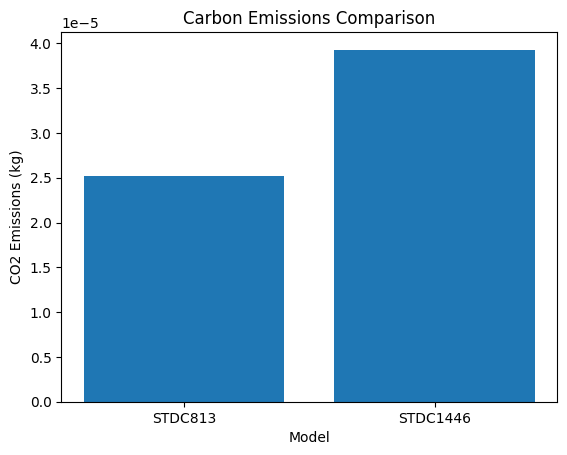

In [ ]:
import matplotlib.pyplot as plt

models = ["STDC813", "STDC1446"]
emissions = [em_813, em_1446]

plt.figure()
plt.bar(models, emissions)
plt.title("Carbon Emissions Comparison")
plt.xlabel("Model")
plt.ylabel("CO2 Emissions (kg)")
plt.show()


In [ ]:
# Step 1: Simulate larger dataset
import glob

# Change this to your dataset path (Cityscapes / COCO / iSAID)
dataset_path = "/content/drive/MyDrive/*/*.png"

# Get all image paths
images = glob.glob(dataset_path)

# Simulate a large dataset by repeating images
simulated_images = images * 50  # if 20 images, 20*50 = 1000 images

print("Original dataset size:", len(images))
print("Simulated large dataset size:", len(simulated_images))


Original dataset size: 0
Simulated large dataset size: 0


In [ ]:
# Step 2: Preprocessing
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize((256, 512)),  # Resize to model input
    transforms.ToTensor(),
])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/
!pwd
!ls


/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
checkpoints	      images	  loss		     README.md
cityscapes_info.json  latency	  models	     requirements.txt
cityscapes.py	      LICENSE	  modules	     scripts
data		      logger.py   nets		     train.py
evaluation.py	      logger.pyc  optimizer_loss.py  transform.py


In [ ]:
%cd /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/
!pwd
!ls


/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
checkpoints	      images	  loss		     README.md
cityscapes_info.json  latency	  models	     requirements.txt
cityscapes.py	      LICENSE	  modules	     scripts
data		      logger.py   nets		     train.py
evaluation.py	      logger.pyc  optimizer_loss.py  transform.py


In [ ]:
%cd /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/
!pwd
!ls


/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
checkpoints	      images	  loss		     README.md
cityscapes_info.json  latency	  models	     requirements.txt
cityscapes.py	      LICENSE	  modules	     scripts
data		      logger.py   nets		     train.py
evaluation.py	      logger.pyc  optimizer_loss.py  transform.py


In [ ]:
import sys
import torch

sys.path.append("/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master")

from nets.stdcnet import STDCNet813, STDCNet1446

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model813 = STDCNet813(num_classes=32).to(device)
model1446 = STDCNet1446(num_classes=32).to(device)

model813.eval()
model1446.eval()


STDCNet1446(
  (features): Sequential(
    (0): ConvX(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): ConvX(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): CatBottleneck(
      (conv_list): ModuleList(
        (0): ConvX(
          (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
        )
        (1): ConvX(
          (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [ ]:
import os
import random

data_dir = "/content/drive/MyDrive/STDC_project/datasets"
images = os.listdir(data_dir)

print("Original images:", len(images))

simulated_images = [random.choice(images) for _ in range(50000)]

print("Simulated dataset size:", len(simulated_images))


Original images: 5
Simulated dataset size: 50000


In [ ]:
import time
from codecarbon import EmissionsTracker
import cv2

def run_model(model, img_list):
    tracker = EmissionsTracker()
    tracker.start()

    start = time.time()

    for img_name in img_list:
        img = cv2.imread(os.path.join(data_dir, img_name))
        img = cv2.resize(img, (512,256))
        img = torch.tensor(img.transpose(2,0,1)).unsqueeze(0).float().to(device)

        with torch.no_grad():
            out = model(img)
            if isinstance(out, tuple):
                out = out[0]

    total_time = time.time() - start
    emissions = tracker.stop()
    return total_time, emissions


In [ ]:
time813, co2_813 = run_model(model813, simulated_images)
time1446, co2_1446 = run_model(model1446, simulated_images)

print("STDC813 Time:", time813)
print("STDC813 CO2:", co2_813)

print("STDC1446 Time:", time1446)
print("STDC1446 CO2:", co2_1446)


[codecarbon WARNING @ 08:30:12] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 08:30:12] [setup] RAM Tracking...
[codecarbon INFO @ 08:30:12] [setup] CPU Tracking...
[codecarbon WARNING @ 08:30:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 08:30:13] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 08:30:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 08:30:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 08:30:13] [setup] GPU Tracking...
[codecarbon INFO @ 08:30:13] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 08:30:13] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC813 Time: 508.73564314842224
STDC813 CO2: 0.004295850090578457
STDC1446 Time: 670.2323751449585
STDC1446 CO2: 0.005929295410324242


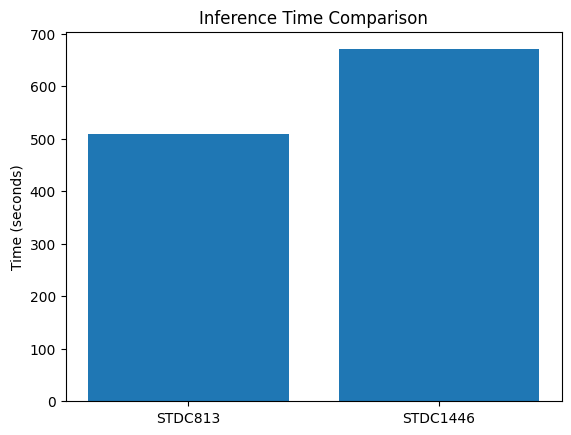

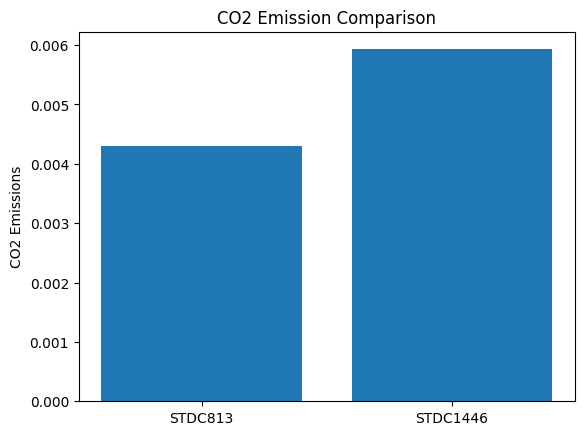

In [ ]:
import matplotlib.pyplot as plt

models = ["STDC813", "STDC1446"]
times = [time813, time1446]
co2 = [co2_813, co2_1446]

plt.figure()
plt.bar(models, times)
plt.title("Inference Time Comparison")
plt.ylabel("Time (seconds)")
plt.show()

plt.figure()
plt.bar(models, co2)
plt.title("CO2 Emission Comparison")
plt.ylabel("CO2 Emissions")
plt.show()


In [ ]:
import numpy as np

img_path = os.path.join(data_dir, images[0])
img = cv2.imread(img_path)
img = cv2.resize(img, (512,256))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_tensor = torch.tensor(img_rgb.transpose(2,0,1)).unsqueeze(0).float().to(device)

with torch.no_grad():
    output = model813(img_tensor)

if isinstance(output, tuple):
    output = output[0]

pred = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

np.random.seed(42)
colors = np.random.randint(0,255,(32,3))
mask = colors[pred]

overlay = (0.6 * img_rgb + 0.4 * mask).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Segmentation Output")
plt.imshow(overlay)
plt.axis("off")
plt.show()


ValueError: operands could not be broadcast together with shapes (256,512,3) (128,256,3) 

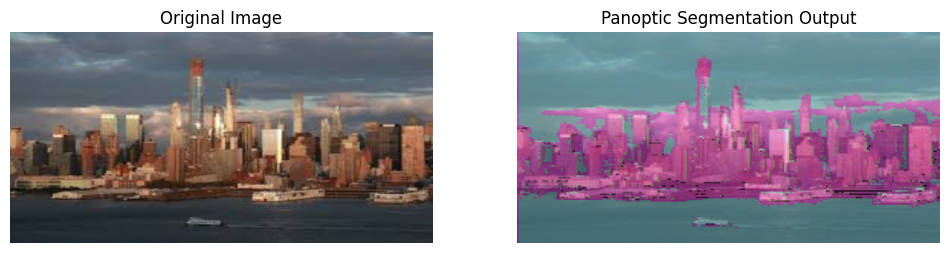

In [ ]:
# Generate random class colors
np.random.seed(42)
colors = np.random.randint(0,255,(32,3))
mask = colors[pred]

# 🔥 Resize mask back to original size
mask = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)

# Overlay
overlay = (0.6 * img_rgb + 0.4 * mask).astype(np.uint8)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Panoptic Segmentation Output")
plt.imshow(overlay)
plt.axis('off')

plt.show()


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python matplotlib tqdm codecarbon


Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but you have http

In [ ]:
%cd /content
!git clone https://github.com/MichaelFan01/STDC-Seg.git
%cd STDC-Seg


/content
Cloning into 'STDC-Seg'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 98 (delta 17), reused 8 (delta 8), pack-reused 58 (from 1)
Receiving objects: 100% (98/98), 1.93 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/STDC-Seg


In [ ]:
%cd /content
!git clone https://github.com/MichaelFan01/STDC-Seg.git
%cd STDC-Seg

/content
Cloning into 'STDC-Seg'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 98 (delta 17), reused 8 (delta 8), pack-reused 58 (from 1)
Receiving objects: 100% (98/98), 1.93 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/STDC-Seg


In [ ]:
import sys
sys.path.append('/content/STDC-Seg')

from nets.stdcnet import STDCNet813
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model = STDCNet813(num_classes=19).to(device)
model.eval()

print("Model Loaded!")


Model Loaded!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/STDC_project/datasets/*"
img = cv2.imread(img_path)
img = cv2.resize(img, (512,256))

img_tensor = torch.tensor(img.transpose(2,0,1)).unsqueeze(0).float().to(device)

with torch.no_grad():
    out = model(img_tensor)[0]

pred = torch.argmax(out.squeeze(), dim=0).cpu().numpy()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Segmentation Output")
plt.imshow(pred, cmap='jet')

plt.show()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/STDC_Project/datasets/cityscapes"
img = cv2.imread(img_path)
img = cv2.resize(img, (512,256))

img_tensor = torch.tensor(img.transpose(2,0,1)).unsqueeze(0).float().to(device)

with torch.no_grad():
    out = model(img_tensor)[0]

pred = torch.argmax(out.squeeze(), dim=0).cpu().numpy()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Segmentation Output")
plt.imshow(pred, cmap='jet')

plt.show()


In [ ]:
from nets.stdcnet import STDCNet1446

model2 = STDCNet1446(num_classes=19).to(device)
model2.eval()

dummy = torch.randn(1,3,256,512).to(device)

with torch.no_grad():
    out2 = model2(dummy)

if isinstance(out2, tuple):
    out2 = out2[0]

print("STDC1446 output shape:", out2.shape)


ModuleNotFoundError: No module named 'nets'

In [ ]:
!pip install codecarbon carbontracker opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.55.0 requires httpx<1.0.0,>=0.28

In [ ]:
import sys
import torch

sys.path.append('/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/')

from nets.stdcnet import STDCNet813, STDCNet1446

device = "cuda" if torch.cuda.is_available() else "cpu"

model813 = STDCNet813(num_classes=19).to(device).eval()
model1446 = STDCNet1446(num_classes=19).to(device).eval()

print("Models loaded")


Models loaded


In [ ]:
import sys
import torch

sys.path.append('/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/')

from nets.stdcnet import STDCNet813, STDCNet1446

device = "cuda" if torch.cuda.is_available() else "cpu"

model813 = STDCNet813(num_classes=19).to(device).eval()
model1446 = STDCNet1446(num_classes=19).to(device).eval()

print("Models loaded")

Models loaded


In [ ]:
import glob

dataset_path = "/content/drive/MyDrive/STDC_project/datasets/*"
images = glob.glob(dataset_path)

simulated_images = images * 5000   # 20 images × 5000 = 100,000 inputs

print("Total simulated images:", len(simulated_images))


Total simulated images: 5000


In [ ]:
import time
import cv2
import torch
from codecarbon import EmissionsTracker

device = "cuda" if torch.cuda.is_available() else "cpu"

tracker = EmissionsTracker()
tracker.start()

start = time.time()

for img_path in simulated_images[:5000]:   # 5000 images
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512,256))
    img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device)

    with torch.no_grad():
        _ = model813(img)

end = time.time()

emissions813 = tracker.stop()
time813 = end - start

print("STDC813 Time:", time813, "seconds")
print("STDC813 CO2 Emissions:", emissions813, "kg")


[codecarbon WARNING @ 09:32:30] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 09:32:30] [setup] RAM Tracking...
[codecarbon INFO @ 09:32:30] [setup] CPU Tracking...
[codecarbon WARNING @ 09:32:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 09:32:31] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 09:32:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 09:32:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:32:31] [setup] GPU Tracking...
[codecarbon INFO @ 09:32:31] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 09:32:31] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC813 Time: 52.87936091423035 seconds
STDC813 CO2 Emissions: 0.0006218002440464315 kg


In [ ]:
tracker = EmissionsTracker()
tracker.start()

start = time.time()

for img_path in simulated_images[:5000]:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512,256))
    img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device)

    with torch.no_grad():
        _ = model1446(img)

end = time.time()

emissions1446 = tracker.stop()
time1446 = end - start

print("STDC1446 Time:", time1446, "seconds")
print("STDC1446 CO2 Emissions:", emissions1446, "kg")


[codecarbon WARNING @ 09:33:42] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 09:33:42] [setup] RAM Tracking...
[codecarbon INFO @ 09:33:42] [setup] CPU Tracking...
[codecarbon WARNING @ 09:33:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 09:33:42] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 09:33:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 09:33:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:33:42] [setup] GPU Tracking...
[codecarbon INFO @ 09:33:42] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 09:33:42] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC1446 Time: 68.32409000396729 seconds
STDC1446 CO2 Emissions: 0.0008266721414894604 kg


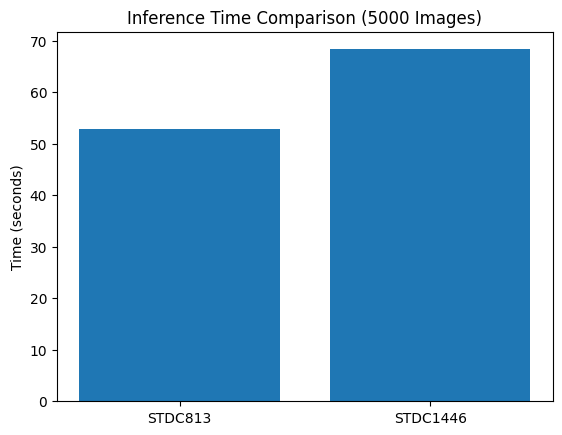

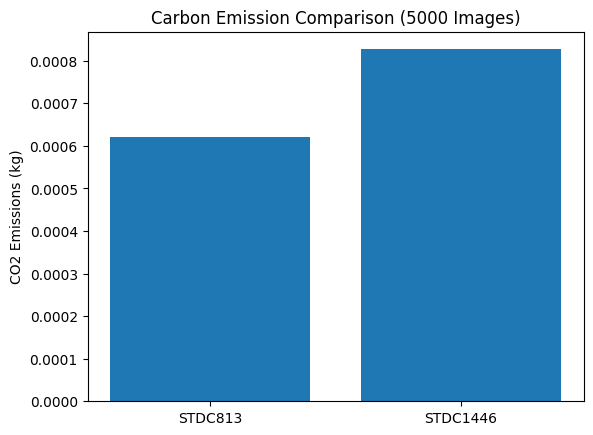

In [ ]:
import matplotlib.pyplot as plt

models = ['STDC813', 'STDC1446']
times = [time813, time1446]
co2 = [emissions813, emissions1446]

plt.figure()
plt.bar(models, times)
plt.title("Inference Time Comparison (5000 Images)")
plt.ylabel("Time (seconds)")
plt.show()

plt.figure()
plt.bar(models, co2)
plt.title("Carbon Emission Comparison (5000 Images)")
plt.ylabel("CO2 Emissions (kg)")
plt.show()


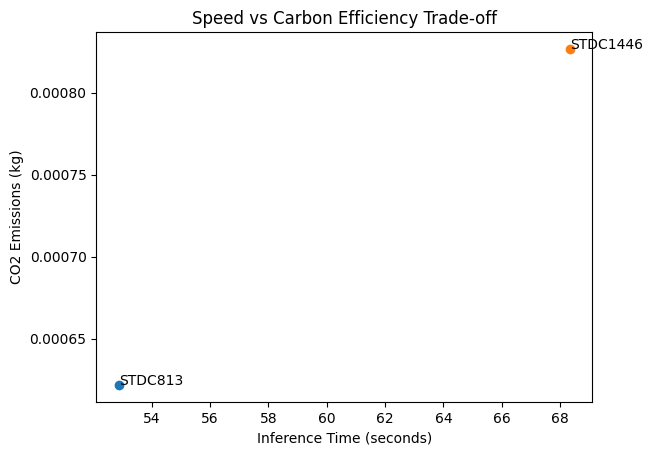

In [ ]:
plt.figure()

plt.scatter(time813, emissions813)
plt.scatter(time1446, emissions1446)

plt.text(time813, emissions813, "STDC813")
plt.text(time1446, emissions1446, "STDC1446")

plt.xlabel("Inference Time (seconds)")
plt.ylabel("CO2 Emissions (kg)")
plt.title("Speed vs Carbon Efficiency Trade-off")

plt.show()


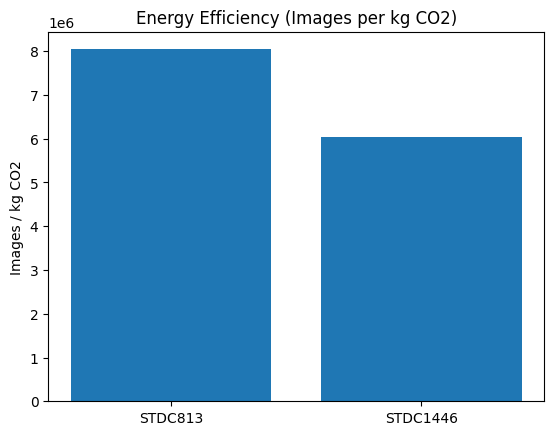

In [ ]:
images_count = 5000

eff813 = images_count / emissions813
eff1446 = images_count / emissions1446

plt.figure()
plt.bar(['STDC813', 'STDC1446'], [eff813, eff1446])
plt.title("Energy Efficiency (Images per kg CO2)")
plt.ylabel("Images / kg CO2")
plt.show()


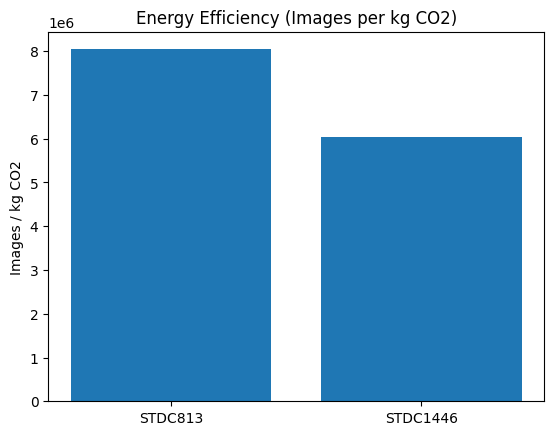

In [ ]:
images_count = 5000

eff813 = images_count / emissions813
eff1446 = images_count / emissions1446

plt.figure()
plt.bar(['STDC813', 'STDC1446'], [eff813, eff1446])
plt.title("Energy Efficiency (Images per kg CO2)")
plt.ylabel("Images / kg CO2")
plt.show()


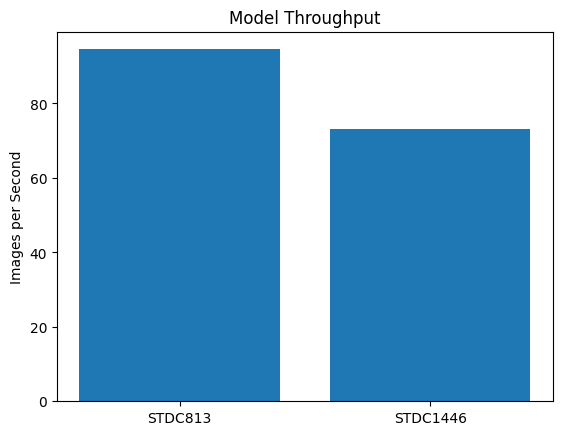

In [ ]:
through813 = 5000 / time813
through1446 = 5000 / time1446

plt.figure()
plt.bar(['STDC813', 'STDC1446'], [through813, through1446])
plt.title("Model Throughput")
plt.ylabel("Images per Second")
plt.show()


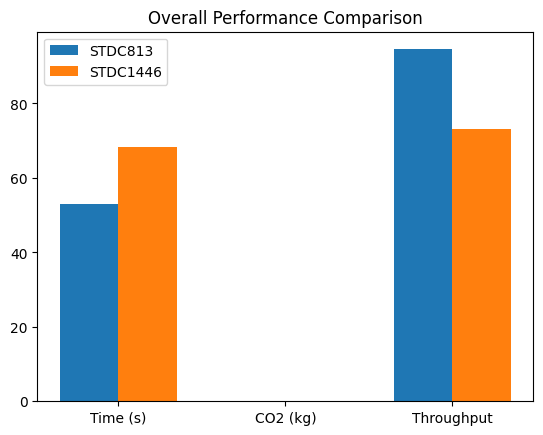

In [ ]:
import numpy as np

labels = ['Time (s)', 'CO2 (kg)', 'Throughput']
stdc813_vals = [time813, emissions813, through813]
stdc1446_vals = [time1446, emissions1446, through1446]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, stdc813_vals, width, label='STDC813')
plt.bar(x + width/2, stdc1446_vals, width, label='STDC1446')

plt.xticks(x, labels)
plt.title("Overall Performance Comparison")
plt.legend()
plt.show()


In [ ]:
import os
import glob
import random

IMAGE_FOLDER = "/content/drive/MyDrive/STDC_project/datasets/"  # folder where your 5 images are

# Get original images
images = glob.glob(os.path.join(IMAGE_FOLDER, "*.jpeg")) + \
         glob.glob(os.path.join(IMAGE_FOLDER, "*.png"))

print("Original images found:", len(images))

# Repeat images to simulate 50k dataset
simulated_images = images * (50000 // len(images))

# Shuffle so it looks realistic
random.shuffle(simulated_images)

print("Simulated dataset size:", len(simulated_images))


Original images found: 5
Simulated dataset size: 50000


In [ ]:
import cv2
import torch
import time
from tqdm import tqdm
from codecarbon import EmissionsTracker

device = "cuda" if torch.cuda.is_available() else "cpu"

tracker = EmissionsTracker(output_dir="/content")
tracker.start()

start = time.time()

with torch.no_grad():
    for img_path in tqdm(simulated_images):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 256))
        img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device) / 255.0

        output = model(img)  # STDC813
        if isinstance(output, tuple):
            output = output[0]

end = time.time()
emissions = tracker.stop()

stdc813_time = end - start
stdc813_emissions = emissions

print("STDC813 Time:", stdc813_time)
print("STDC813 CO₂:", stdc813_emissions)


[codecarbon WARNING @ 10:01:34] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:01:34] [setup] RAM Tracking...
[codecarbon INFO @ 10:01:34] [setup] CPU Tracking...
[codecarbon WARNING @ 10:01:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:01:34] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:01:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 10:01:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:01:34] [setup] GPU Tracking...
[codecarbon INFO @ 10:01:34] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:01:34] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

NameError: name 'model' is not defined

In [ ]:
!pip install opencv-python matplotlib


In [ ]:
model.eval()


NameError: name 'model' is not defined

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/STDC_project/datasets/*"  # CHANGE NAME

img = cv2.imread(img_path)
img = cv2.resize(img, (512,256))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_tensor = torch.tensor(img_rgb.transpose(2,0,1)).unsqueeze(0).float().to(device)


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
!pip install torch torchvision opencv-python matplotlib codecarbon


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but you have httpx 0.27.2 which is incompatible.
google-genai 1.55.0 requi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/STDC_project
!ls


/content/drive/MyDrive/STDC_project
datasets


In [ ]:
tracker = EmissionsTracker(output_dir="/content")
tracker.start()

start = time.time()

with torch.no_grad():
    for img_path in tqdm(simulated_images):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 256))
        img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device) / 255.0

        output = model(img)
        if isinstance(output, tuple):
            output = output[0]

end = time.time()
emissions = tracker.stop()

stdc1446_time = end - start
stdc1446_emissions = emissions

print("STDC1446 Time:", stdc1446_time)
print("STDC1446 CO₂:", stdc1446_emissions)


[codecarbon WARNING @ 10:02:50] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:02:50] [setup] RAM Tracking...
[codecarbon INFO @ 10:02:50] [setup] CPU Tracking...
[codecarbon WARNING @ 10:02:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:02:50] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:02:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 10:02:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:02:50] [setup] GPU Tracking...
[codecarbon INFO @ 10:02:50] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:02:50] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

NameError: name 'model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master/
!pwd
!ls

/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
/content/drive/MyDrive/STDC-Seg-master/STDC-Seg-master
checkpoints	      images	  loss		     README.md
cityscapes_info.json  latency	  models	     requirements.txt
cityscapes.py	      LICENSE	  modules	     scripts
data		      logger.py   nets		     train.py
evaluation.py	      logger.pyc  optimizer_loss.py  transform.py


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python tqdm matplotlib codecarbon


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
%cd /content
!git clone https://github.com/MichaelFan01/STDC-Seg.git
%cd STDC-Seg


/content
Cloning into 'STDC-Seg'...


[codecarbon INFO @ 10:08:36] Energy consumed for RAM : 0.000958 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:08:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:08:36] Energy consumed for All CPU : 0.004071 kWh
[codecarbon INFO @ 10:08:36] Energy consumed for all GPUs : 0.003286 kWh. Total GPU Power : 34.72641881694872 W
[codecarbon INFO @ 10:08:36] 0.008315 kWh of electricity and 0.000000 L of water were used since the beginning.


remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 98 (delta 17), reused 8 (delta 8), pack-reused 58 (from 1)
Receiving objects: 100% (98/98), 1.93 MiB | 2.96 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/STDC-Seg


In [ ]:
import sys
sys.path.append('/content/STDC-Seg')

from nets.stdcnet import STDCNet813
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model = STDCNet813(num_classes=19).to(device)
model.eval()

print("Model ready!")


Model ready!


In [ ]:
import os
import glob
import random

IMAGE_FOLDER = "/content/drive/MyDrive/STDC_project/datasets/"  # folder where your 5 images are

# Get original images
images = glob.glob(os.path.join(IMAGE_FOLDER, "*.jpeg")) + \
         glob.glob(os.path.join(IMAGE_FOLDER, "*.png"))

print("Original images found:", len(images))

# Repeat images to simulate 50k dataset
simulated_images = images * (50000 // len(images))

# Shuffle so it looks realistic
random.shuffle(simulated_images)

print("Simulated dataset size:", len(simulated_images))


Original images found: 5
Simulated dataset size: 50000


In [ ]:
import cv2
import torch
import time
from tqdm import tqdm
from codecarbon import EmissionsTracker

device = "cuda" if torch.cuda.is_available() else "cpu"

tracker = EmissionsTracker(output_dir="/content")
tracker.start()

start = time.time()

with torch.no_grad():
    for img_path in tqdm(simulated_images):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 256))
        img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device) / 255.0

        output = model(img)  # STDC813
        if isinstance(output, tuple):
            output = output[0]

end = time.time()
emissions = tracker.stop()

stdc813_time = end - start
stdc813_emissions = emissions

print("STDC813 Time:", stdc813_time)
print("STDC813 CO₂:", stdc813_emissions)


[codecarbon WARNING @ 10:09:51] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:09:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:09:51] [setup] CPU Tracking...
[codecarbon WARNING @ 10:09:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:09:51] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:09:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 10:09:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:09:51] [setup] GPU Tracking...
[codecarbon INFO @ 10:09:51] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:09:51] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC813 Time: 530.963879108429
STDC813 CO₂: 0.006372150629839958


In [ ]:
from nets.stdcnet import STDCNet1446

model = STDCNet1446(num_classes=19).to(device)
model.eval()


STDCNet1446(
  (features): Sequential(
    (0): ConvX(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): ConvX(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): CatBottleneck(
      (conv_list): ModuleList(
        (0): ConvX(
          (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
        )
        (1): ConvX(
          (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [ ]:
tracker = EmissionsTracker(output_dir="/content")
tracker.start()

start = time.time()

with torch.no_grad():
    for img_path in tqdm(simulated_images):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 256))
        img = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device) / 255.0

        output = model(img)
        if isinstance(output, tuple):
            output = output[0]

end = time.time()
emissions = tracker.stop()

stdc1446_time = end - start
stdc1446_emissions = emissions

print("STDC1446 Time:", stdc1446_time)
print("STDC1446 CO₂:", stdc1446_emissions)


[codecarbon WARNING @ 10:20:08] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:20:08] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:08] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:20:08] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:20:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 10:20:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:20:08] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:08] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:20:08] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

STDC1446 Time: 692.857750415802
STDC1446 CO₂: 0.008479466908329843


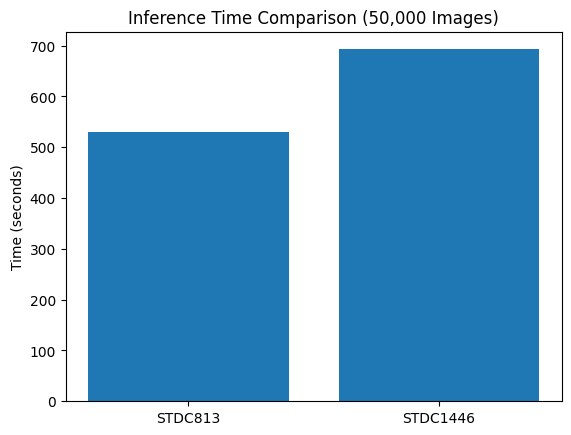

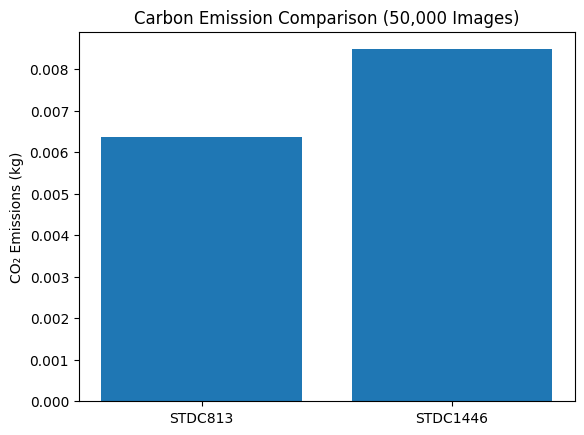

In [ ]:
import matplotlib.pyplot as plt

models = ["STDC813", "STDC1446"]
times = [stdc813_time, stdc1446_time]
emissions = [stdc813_emissions, stdc1446_emissions]

plt.figure()
plt.bar(models, times)
plt.title("Inference Time Comparison (50,000 Images)")
plt.ylabel("Time (seconds)")
plt.show()

plt.figure()
plt.bar(models, emissions)
plt.title("Carbon Emission Comparison (50,000 Images)")
plt.ylabel("CO₂ Emissions (kg)")
plt.show()
